In [9]:
import ipywidgets as widgets
from ipywidgets import interact, SelectMultiple, fixed, Checkbox, IntRangeSlider, IntSlider, FloatSlider
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import plotly.express
from tqdm.autonotebook import tqdm
from src.DataExtractor import DataExtractor


data_extractor = DataExtractor()

In [2]:
# team_1_2017 = data_extractor.get_season_data_for_team(2017, 1)
df_season_league = data_extractor.get_season_into_dataframe('./hockey/Season20172018/season20172018.json')
df_season_league.tail()

,about.periodTime,about.eventId,team.name,team.id,result.eventTypeId,coordinates.x,coordinates.y,players.0.player.fullName,players.1.player.fullName,result.secondaryType,result.strength.code,result.emptyNet,gamePk
87132,16:01,714,Vegas Golden Knights,54,SHOT,-33.0,-25.0,Colin Miller,Braden Holtby,Wrist Shot,None,None,2017030415
87133,16:06,715,Vegas Golden Knights,54,SHOT,-35.0,-29.0,Colin Miller,Braden Holtby,Slap Shot,None,None,2017030415
87134,16:08,716,Vegas Golden Knights,54,SHOT,-82.0,-3.0,Alex Tuch,Braden Holtby,Wrist Shot,None,None,2017030415
87135,16:09,717,Vegas Golden Knights,54,SHOT,-83.0,-4.0,Alex Tuch,Braden Holtby,Wrist Shot,None,None,2017030415
87136,17:56,723,Vegas Golden Knights,54,SHOT,-54.0,33.0,James Neal,Braden Holtby,Wrist Shot,None,None,2017030415


In [3]:
# team_1_shots = data_extractor.get_shots(team_1_2017, 1)
team_1_shots = data_extractor.get_team_shots_from_dataframe(df_season_league, 1)

In [11]:
# cut the image
from PIL import Image

im = Image.open(r'../figures/nhl_rink.png')
width, height = im.size
print(width, height)
print(width/height)
new_w = width/2
im_new = im.crop((new_w, 0, width, height))
# im_new
new_width, height = im_new.size
print(new_width, height)

1100 467
2.355460385438972
550 467


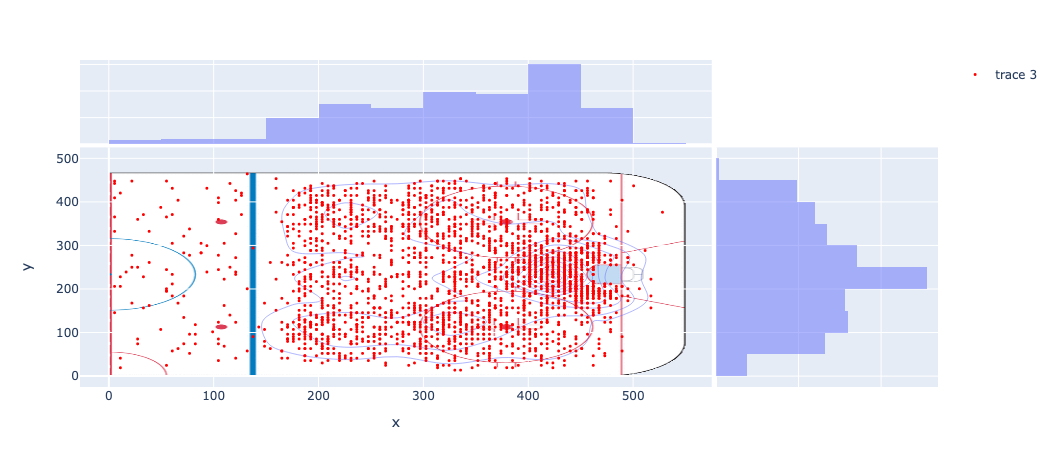

In [14]:
import plotly.graph_objects as go
##
# rink = [-100,100] * [-42.5, 42.5]
# image =  [0,550] * [0,467]
###
#transformation
ratio_w = new_width / 100
ratio_l = height / 85

# source='nhl_rink.png'
source = im_new

coor_x = np.abs((team_1_shots[:,0]) * ratio_w)
coor_y = (team_1_shots[:,1]+42.5) * ratio_l
# fig=go.Figure()
fig = plotly.express.density_contour(x=coor_x, y =coor_y, marginal_x='histogram', marginal_y='histogram') #marginal_x='histogram'
fig.add_layout_image(
        source=source,
        xref="x",
        yref="y",
        x=0,
        y=height,
        xanchor="left",
        yanchor="top",
        layer="below",
        sizing="stretch",
        sizex=new_width,
        sizey=height
    )           
fig.add_scatter(x=coor_x, y=coor_y, 
                mode="markers",marker=dict(
                    color="red",
                    size=3 ))
fig.update_layout(
    width=new_width,
    height = height,
)     



In [29]:
year = 2017
df_season_league = data_extractor.get_season_into_dataframe('./hockey/Season' + str(year) + str(year + 1) + '/season' + str(year) + str(year + 1) + '.json')

In [40]:
def generate_stats(df_season_league: pd.DataFrame, team_ids: list):
    total_shot_count = 0
    total_league_time_played_in_minutes = 0
    
    for team_id in tqdm(team_ids, total = len(team_ids)):
        team_season_shots = data_extractor.get_team_shots_from_dataframe(df_season_league, team_id)
        total_shot_count += len(team_season_shots)
        
        team_season_time = data_extractor.get_time_played_from_team_season_dataframe(df_season_league, team_id)
        total_league_time_played_in_minutes += np.sum(team_season_time)
    
    total_league_time_played_in_hours = total_league_time_played_in_minutes / 60
    return total_shot_count / total_league_time_played_in_hours


def generate_total_shots_array(df_season_league: pd.DataFrame, team_ids: list):
    total_shots = np.array([])
    
    for team_id in tqdm(team_ids, total = len(team_ids)):
        team_season_shots = data_extractor.get_team_shots_from_dataframe(df_season_league, team_id)
        total_shots = np.append(total_shots, team_season_shots)
        
    return total_shots

    
def calculate_league_shots_per_hour(df_season_league: pd.DataFrame) -> float:
    team_ids = list(range(1,56))
    return generate_stats(df_season_league, team_ids)


def calculate_team_shots_per_hour(df_season_league: pd.DataFrame, team_id: int) -> float:
    team_ids = [team_id]
    return generate_stats(df_season_league, team_ids)


def get_total_league_shots_array(df_season_league: pd.DataFrame) -> np.array:
    team_ids = list(range(1,56))
    return generate_total_shots_array(df_season_league, team_ids)


def get_total_team_shots_array(df_season_league: pd.DataFrame, team_id: int) -> np.array:
    team_ids = [team_id]
    return generate_total_shots_array(df_season_league, team_ids)
    

In [34]:
print(calculate_league_shots_per_hour(df_season_league))
print(calculate_team_shots_per_hour(df_season_league, 1))

  0%|          | 0/55 [00:00<?, ?it/s]

32.15092250922509


  0%|          | 0/1 [00:00<?, ?it/s]

32.172413793103445


In [41]:
print(len(get_total_league_shots_array(df_season_league)))
print(len(get_total_team_shots_array(df_season_league, 1)))

  0%|          | 0/55 [00:00<?, ?it/s]

174258


  0%|          | 0/1 [00:00<?, ?it/s]

5598


In [ ]:
# TO-DO: calculate the binning or the kernel density on these 2D values and generate the differrence so that we can map it

In [12]:
team_1_2017 = data_extractor.get_season_data_for_team(2017, 1)
team_1_shots = data_extractor.get_shots(team_1_2017, 1)
team_shot_rate = 0
shot_count = len(team_1_shots)
game_count = len(team_1_2017.keys())
print(game_count)
total_time = game_count * 1
team_shot_rate = shot_count / total_time
print(shot_rate)

89


NameError: name 'shot_rate' is not defined

In [106]:
coor_x

array([441. , 386. , 534.5, ..., 331. , 287. , 507. ])

In [11]:
team_1_shots

array([[ 62., -23.],
       [ 52.,  25.],
       [ 79.,  -4.],
       ...,
       [-42.,  27.],
       [-34.,  -3.],
       [-74.,   7.]])